In [79]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
from pandas.core.describe import DataFrameDescriber
df = pd.read_csv('/content/drive/MyDrive/notebooks /diabetes-2.csv')

In [82]:
#first 5 row
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
#Last 5 row
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [84]:
# checking for na
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
#checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


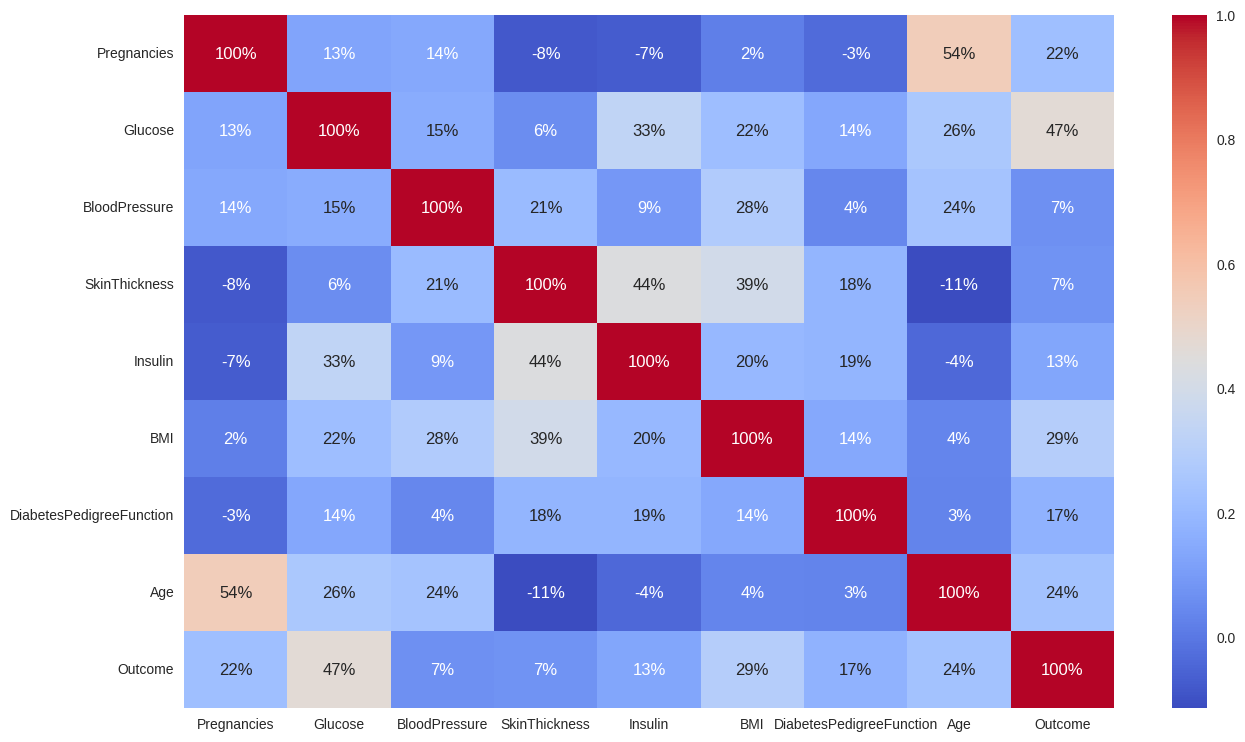

In [86]:
plt.figure(figsize=(15, 9))  # Adjust the figure size to your preference
# Create the correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='coolwarm')
plt.show()

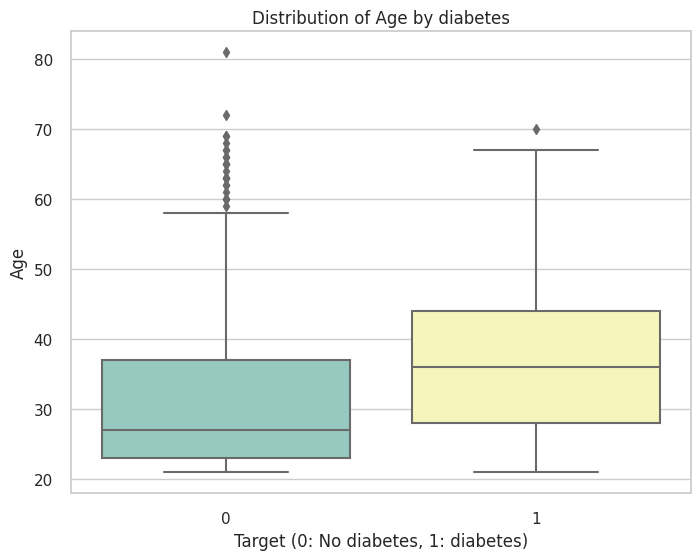

In [110]:
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(x="Outcome", y="Age", data=df, palette="Set3")

# Set labels and title
plt.xlabel("Target (0: No diabetes, 1: diabetes)")
plt.ylabel("Age")
plt.title("Distribution of Age by diabetes")

# Show the plot
plt.show()

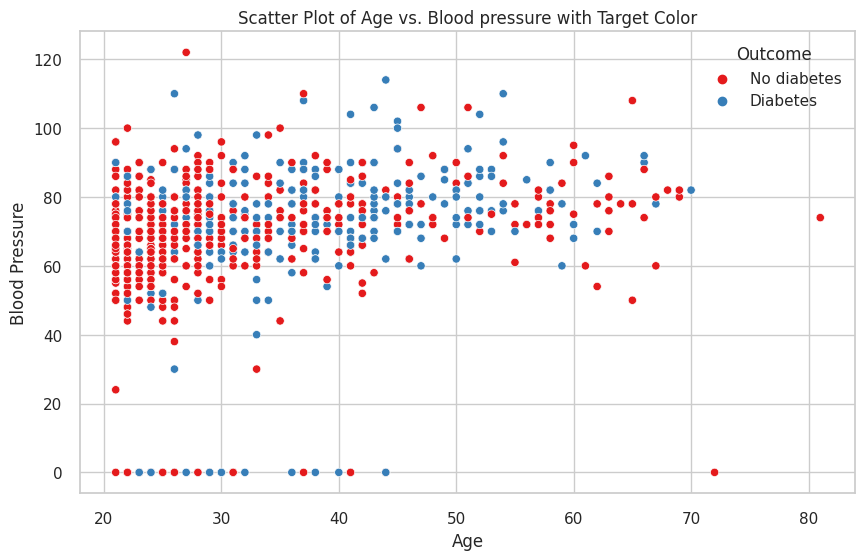

In [118]:
# Set the style for the plot (optional) Source : AI
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
scatter_plot = sns.scatterplot(x="Age", y="BloodPressure", hue="Outcome", data=df, palette="Set1")

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.title("Scatter Plot of Age vs. Blood pressure with Target Color")

# Modify legend labels and colors
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, title="Outcome", labels=["No diabetes", "Diabetes"])

# Show the plot
plt.show()

In [87]:
X = df[['Pregnancies'	,'Glucose'	,'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']].values

In [88]:
y = df[['Outcome']].values

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [123]:
#standardizing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
from sklearn.neighbors import KNeighborsClassifier
#here we are calling our KNN model knn.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

# Define the number of folds for cross-validation
k = 5

# Create a KFold cross-validation object with k splits
kf = KFold(n_splits=k)

# Perform cross-validation using k-fold on the knn model
result = cross_val_score(knn, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
# Calculate accuracy for each fold using the provided knn model and training data

# Print the average accuracy across all folds
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.7038248528902733


In [91]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train.ravel())

LogisticRegression()

In [129]:


# Perform cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Cross-Validation Scores: [0.77272727 0.74675325 0.75974026 0.81699346 0.75163399]
Mean CV Accuracy: 0.7695696460402341


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

In [92]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y=classifier.predict_proba(X_test)

In [93]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[[0, 1]])

In [94]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [95]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [96]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [97]:
comparison_of_true_pred

,y_test,y_pred,0,1
0,1,1,4.513316,95.486684
1,0,0,84.013014,15.986986
2,0,0,91.456451,8.543549
3,1,1,35.905290,64.094710
4,0,0,88.627057,11.372943
...,...,...,...,...
226,1,0,76.806305,23.193695
227,1,0,76.715063,23.284937
228,0,0,95.243339,4.756661
229,0,0,83.135317,16.864683


In [98]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[141  16]
 [ 35  39]]


In [99]:
# generating classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [100]:
!pip install pyclustering

In [101]:
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

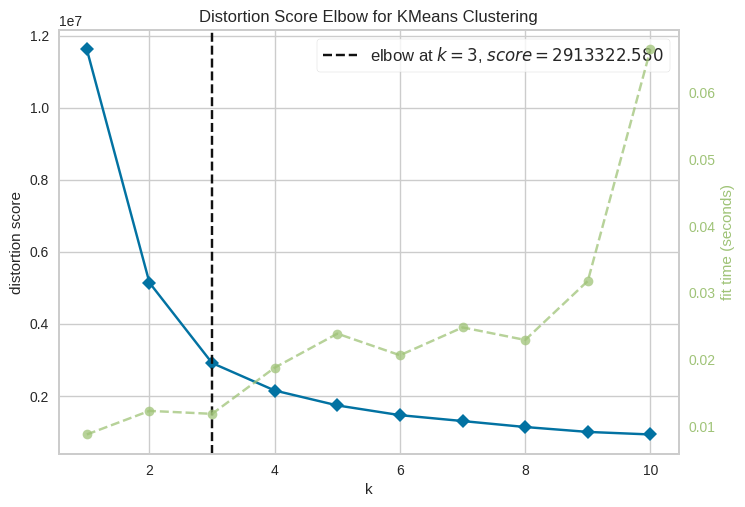

In [102]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [103]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=10)

# call fit method with data
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_

# cluster label for each data point
labels = km_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


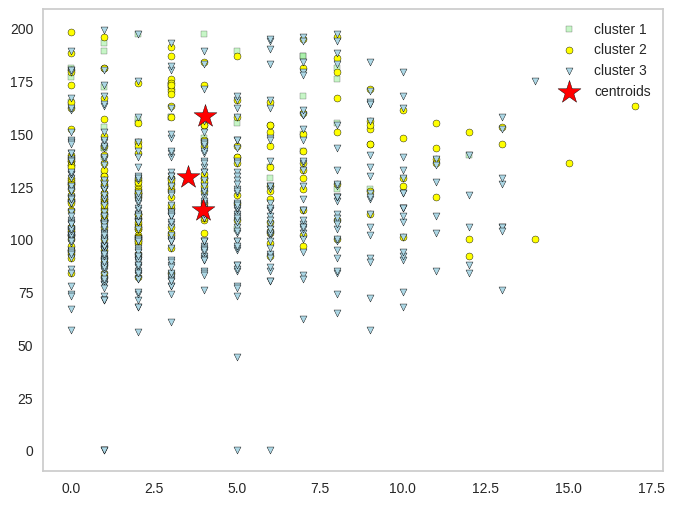

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    #label='cluster 1'
    label='cluster 1', alpha=0.5
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [105]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 65.89%


In [106]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 65.89%
The purity score for squared euclidean distance is 65.89%
The purity score for manhattan distance is 66.15%
The purity score for chebyshev distance is 65.89%
The purity score for canberra distance is 65.1%
The purity score for chi-square distance is 65.1%
